# Chapter 8. 차원 축소

많은 경우 머신러닝 문제는 훈련 샘플 각각이 수천 심지어 수백만 개의 특성을 가지고 있습니다. 이는 훈련을 느리게 할 뿐만 아니라 앞으로 보게되겠지만 좋은 솔루션을 찾기 어렵게 만듭니다. 이런 문제를 종종 **차원의 저주**(curse of dimensionality)라고 합니다.

다행히도 실전 문제에서는 특성 수를 크게 줄여서 불가능한 문제를 가능한 범위로 변경할 수 있는 경우가 많습니다. 분명 차원을 축소시키면 일부 정보가 유실됩니다. (JPEG로 이미지를 압축하면 품질이 감소되는 것처럼) 그래서 훈련 속도가 빨라질 수는 있지만 시스템의 성능이 조금 나빠질 수 있습니다. 또한 직업 파이프라인이 조금 더 복잡하게 되고 유지 관리가 어려워집니다. 그러므로 차원 축소를 고려하기 전에 훈련이 너무 느린지 먼저 원본 데이터로 시스템을 훈련시켜봐야 합니다. 그러나 어떤 경우에는 훈련 데이터의 차원을 축소시키면 잡음이나 불필요한 세부 사항을 걸러내므로 성능을 높일 수 있습니다.

훈련 속도를 높이는 것 외에 차원 축소는 데이터 시각화에도 아주 유용합니다. 차원 수를 둘로 줄이면 고차원 훈련 세트를 하나의 그래프로 그릴 수 있고 군집 같은 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 많습니다. 

이 장에서는 차원의 저주에 대해 논의하고 고차원의 공간에서 어떤 일이 일어나고 있는지 알아보도록 하겠습니다. 그런 다음 차원 축소에 사용되는 두 가지 주요 접근 방법을 소개하겠습니다. (투영(projection)과 매니폴드 학습(manifold learning)) 그리고 가장 인기있는 차원 축소 기법인 PCA, 커널 PCA, LLE를 다루도록 하겠습니다.

## 1. 차원의 저주

우리는 3차원의 세계에서 살고있어서 고차원의 공간을 직관적으로 상상하기 어렵습니다. 고차원에서는 많은 것이 상당히 다르게 작동합니다. 예를 들어 단위 면적 안에 있는 점을 무작위로 선택한다면 경계선에서 0.001 이내에 위치할 가능성은 0.4%입니다. 하지만 10,000차원의 단위 면적을 가진 초입방체에서는 이 가능성이 99.99999%보다 커집니다. 고차원 초입방체에 있는 대다수의 점은 경계와 매우 가까이 있습니다.

고차원의 데이터는 예측을 위해 많은 외삽(extrapolation)을 해야하기 때문에 저차원일때보다 예측이 더 불안정합니다. 간단히 말해 *훈련 세트의 차원이 클수록 과대 적합의 위험이 커집니다.*

이론적으로 차원의 저주를 해결하는 해결책 하나는 훈련 샘플의 밀도가 충분히 높아질 때 까지 훈련 세트의 크기를 키우는 것입니다. 불행하게도 실제로는 일정 밀도에 도달하기 위해 필요한 훈련 샘플 수는 차원 수가 커짐에 따라 기하급수적으로 늘어납니다. 특성 수가 단 100개라고 생각해도 모든 차원에 걸쳐 균일하게 퍼져있다고 가정하고 훈련 샘플을 서로 평균 0.1 이내에 위치시키려면 관측 가능한 우주에 있는 원자 수를 모두 합친 것보다 더 많은 훈련 샘플을 모아야 합니다. (오우..)



## 2. 차원 축소를 위한 접근 방법

구체적인 차원 축소 알고리즘을 알아보기 전에 차원을 감소시키는 두 가지 주요한 접근법인 투영(projection)과 매니폴드 학습(manifold learning)을 알아봅시다.

### 2.1 투영

대부분의 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않습니다. 많은 특성은 거의 변화가 없는 반면, 다른 특성들은 서로 강하게 연관되어 있습니다. 결과적으로 모든 훈련 샘플이 사실 고차원 공간 안의 저차원 **부분 공간**(subspace)에 놓여있습니다. 

![img](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch8fig1.png)

모든 훈련 샘플이 거의 평면 형태로 놓여있습니다. 이것이 고차원(3D) 공간에 있는 저차원(2D) 부분 공간입니다. 여기서 모든 훈련 샘플을 이 부분 공간에 수직으로(즉, 샘플과 평면 사이의 가장 짧은 직선을 따라) 투영하면 아래 그림과 같은 2D 데이터셋을 얻습니다. 데이터 셋의 차원을 3D에서 2D로 줄인 것입니다. 각 축은 새로운 특성 $z_1$과 $z_2$에 대응됩니다.

![img](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch8fig2.png)

그러나 차원 축소에 있어 투영이 언제나 최선의 방법은 아닙니다. 많은 경우 아래 그림처럼 **스위스 롤**(swiss roll) 데이터셋처럼 부분 공간이 뒤틀리거나 휘어 있기도 합니다. 

![img](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch8fig3.png)

그냥 평면에 투영시키면 아래 그림의 왼쪽처럼 스위스 롤의 층이 서로 뭉개집니다. 하지만 우리가 원하는 것은 스위스 롤을 펼쳐서 오른쪽 그림처럼 2D 데이터 셋을 얻는 것입니다. 

![img](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch8fig4.png)

### 2.2 매니폴드 학습

스위스 롤은 2D의 **매니폴드**의 한 예입니다. 간단히 말해 2D 매리폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D 모댱입니다. 더 일반적으로 $d$차원 매니폴드는 국부적으로 $d$차원 초평면으로 보일 수 있는 $n$차원 공간의 일부입니다.($d < n$). 스위스 롤의 경우에는 $d=2$이고, $n=3$입니다. 국부적으로는 2D 평면처럼 보이지만 3차원으로 말려 있습니다. 

많은 차원 축소 알고리즘이 훈련 샘플이 놓여있는 **매니 폴드**를 모델링 하는 식으로 작동합니다. 이를 **매니폴드 학습**(manifold learning)이라고 합니다. 이는 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 **매니폴드 가정**(manifold assumption) 또는 **매니폴드 가설**(manifold hypothesis)에 근거합니다. 경헙적으로도 이런 가정은 매우 자주 발견됩니다.

여기에서도 MNIST 데이터셋으로 생각해보겠습니다. 전체 손글씨 숫자 이미지는 어느 정도 비슷한 면이 있습니다. 선으로 연결되어 있고 경계는 흰색이고 어느정도 중앙에 있습니다. 무작위로 생성된 이미지라면 그 중 아주 적은 일부만 손글씨 숫자처럼 보일 것입니다. 다시 말해 숫자 이미지를 만들 때 가능한 자유도는 아무 이미지나 생성할 때의 자유도보다 훨씬 낮습니다. 이런 제약은 데이터 셋을 저차원의 매니폴드로 압축할 수 있도록 도와줍니다.

매니폴드 가정은 종종 암묵적으로 다른 가정과 병행되곤 합니다. 바로 처리해야할 작업이(예를 들어 분류나 회귀)이 저아춴의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정입니다. 아래 그림의 두번째 행의 경우에는 결정 경계가 $x_1=5$에 놓여있습니다. 이 결정 경계는 3D 공간에서는 매우 단순합니다. 하지만 펼쳐진 매니폴드에서는 결정 경계가 더 복잡해졌습니다. 

![img](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch8fig5.png)

그러나 이런 가정이 항상 유효하지는 않습니다. 

요약하자면 모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면 훈련 속도는 빨자지지만 항상 더 낫거나 간단한 솔루션이 되는 것은 아닙니다. 이는 전적으로 데이터 셋에 달렸습니다.


In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

## 3. PCA

**주성분 분석**(Principal Component Analysis)(PCA)는 가장 인기있는 차원 축소 알고리즘입니다. 먼저 데이터에 가장 가까운 초평면(hypterplane)을 정의한 다음, 데이터를 이 평면에 투영시킵니다.

### 3.1 분산 보존

저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 합니다. 예를 들어 아래 왼쪽 그래프는 간단한 2D 데이터셋이 세 개의 축과 함께 표현되어 있습니다. 오른쪽 그래프는 데이터셋이 각 축에 투영된 결과입니다. 여기서 볼 수 있듯이 실선에 투영된 것은 분산을 최대로 보존하는 반면, 점선에 투영된 것은 분산을 매우 적게 유지하고 있습니다. 가운데 파선에 투영된 것은 분산을 중간 정도로 유지하고 있습니다. 

![img](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch8fig6.png)

다른 방향으로 투영하는 것보다 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보입니다. 이 선택을 다른 방식으로 설명하면 원본 데이터셋과 투영된 것 사이에 평균 제곱 거리를 최소화하는 축입니다. 이 방식이 PCA를 더 간단하게 설명할 수 있습니다.


### 3.2 주성분

PCA는 훈련 세트에 *분산이 최대인 축*을 찾습니다. 위 그림에서는 실선이 됩니다. 또한 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두번째 축을 찾습니다. 이 2D 예제에서는 선택의 여지가 없습니다. 즉, 점선이 됩니다. 고차원 데이터셋이라면 PCA는 이전의 두 축에 직교한느 세번째 축을 찾으며 데이터셋에 있는 차원의 수만큼 네 번째, 다섯번째, ... 축을 찾습니다.

$i$번째 축을 정의하는 단위 벡터를 $i$번째 **주성분**(Principal Component)(PC)라고 부릅니다. 위 그림에서 첫번째 PC는 $c_1$이고, 두번째 PC는 $c_2$입니다. 

#### 훈련 세트의 주성분을 찾는 방법

그럼 훈련 세트의 주성분을 어떻게 찾을까요? 다행히 **특잇값 분해**(Singular Value Decomposition)(SVD)라는 표준 행렬 분해 기술이 잇어서 훈련 세트 행렬 X를 세 개의 행렬의 점 곱인 $U \cdot \sum \cdot V^T$로 분해할 수 있습니다. 여기서 찾고자 하는 모든 주성분이 $V$에 아래와 같이 담겨 있습니다. 

![img](https://t1.daumcdn.net/cfile/tistory/99ECE34A5B646BF22C)

아래 코드는 넘파이의 `svd()` 함수를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두개의 PC를 추출합니다.


In [2]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]



PCA는 데이터셋의 평균이 0이라고 가정합니다. 앞으로 볼 사이킷런의 PCA 파이썬 클래스는 이 작업을 대신 처리해줍니다. 그러나 앞의 코드처럼 PCA를 직접 구현하거나 다른 라이브러리를 사용한다면 먼저 데이터를 원점에 맞추는 것을 잊어서는 안됩니다. 

### 3.3 d차원으로 투영하기

주성분을 모두 추출해냈다면 처음 $d$개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 $d$차원으로 축소시킬 수 있습니다. 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장합니다. 

초평면에 훈련 세트를 투영하기 위해서는 아래 식과 같이 행렬 $X$와 첫 $d$개의 주성분을 담은 행렬 $W_d$를 점곱하면 된다.

$$X_{d-proj} = X \cdot  W_d$$

아래 코드는 첫 두개의 주성분으로 정의된 평면에 훈련 세트를 투영합니다.

```python
X2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
```

PCA 변환이 되었습니다. 지금까지 분산을 가능한 최대로 유지하면서 어떻게 데이터셋의 차원을 축소하는지 보았습니다. 

In [3]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

### 3.4 사이킷런 사용하기

사이킷런의 PCA 모델은 앞서 한 것 처럼 SVD 분해 방법을 사용하여 구현합니다. 다음은 PCA모델을 사용해 데이터셋의 차원을 2로 줄이는 코드입니다. 사이킷런의 PCA 모델은 데이터를 중앙에 맞춰줍니다.


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

PCA 변환기를 데이터셋에 학습시키고 나면 `components_` 변수를 사용해 주성분을 확인할 수 있습니다. 이 변수에는 주성분이 행 벡터로 포함되어 있으므로 첫 번째 주성분은 `pca`, `components_.T[:, 0]`이 됩니다.

### 3.5 설명된 분산의 비율

`explained_variance_ratio_` 변수에 저장된 주성분의 **설명된 분산의 비율**(explained variance ratio)도 유용한 정보 중 하나입니다. 이 값은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냅니다. 

In [5]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

이는 데이터셋 분산의 84.2%가 첫 번째 축에 놓여있고 14.6%가 두번째 축에 놓여있음을 알려줍니다. 세 번째 축에는 1.2% 미만이 남아있을 것이므로 아주 적은 양의 정보가 들어있다고 생각해도 됩니다. 

### 3.6 적절한 차원 수 선택하기

축소할 차원 수를 임의로 정하기 보다는 충분한 분산(예를 들면 95%)이 될 때까지 더해야 할 차원 수를 선택하는 쪽을 더 선호합니다. 물론 데이터 시각화를 위해 차원을 축소하는 경우에는 차원을 2개나 3개로 줄이는 것이 일반적입니다. 

다음 코드는 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트 분산을 95%로 유지하는 데 필요한 최소한의 차원 수를 계산합니다.


In [6]:
from six.moves import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [7]:
from sklearn.model_selection import train_test_split

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [9]:
d

154

그런 다음 `n_components = d`로 설정하여 PCA를 다시 실행합니다. 하지만 유지하려는 주성분의 수를 지정하기 보다는 보존하려는 분산의 비율을 `n_components`에 0.0에서 1.0 사이로 설정하는 편이 훨씬 낫습니다. 


In [10]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [11]:
pca.n_components_

154

또 다른 방법은 설명된 분산을 차원 수에 대한 함수로 그리는 것입니다. (그냥 `cumsum`을 그래프로 그려도 됩니다.) 일반적으로 이 그래프에는 설명된 분산의 빠른 성장이 멈추는 변곡점이 있습니다. 이를 데이터셋에 내재된 고유 차원으로 생각할 수 있습니다. 여기서는 차원을 약 100으로 축소해도 설명된 분산을 크게 손해보지 않을 것입니다. 



### 3.7 압축을 위한 PCA

확실히 차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어듭니다. 예를 들어 MNIST 데이터셋에 분산의 95%를 유지하도록 PCA를 적용해보겠습니다. 각 샘플은 원래 784개 특성이 아니라 150개 정도만 가지고 있을 것입니다. 대부분의 분산은 유지되었지만 데이터셋은 원본 크기의 20% 미만이 되었습니다. 이는 상당한 압축률이고 (SVM같은) 알고리즘의 속도를 크게 높일 수 있습니다. 

또한 압축된 데이터셋에서 PCA 투영의 변환을 반대로 적용하여 784개의 차원으로 되돌릴수도 있습니다. 물론 투영에서 일정량의 정보(유실된 5%의 분산)를 잃어버렸기 때문에 이렇게 해도 원본 데이터셋을 얻을 수는 없습니다. 하지만 원본 데이터와 매우 비슷할 것입니다. 원본 데이터와 재구성된 데이터(압축 후 원복한 것) 사이의 평균 제곱 거리를 **재구성 오차**(reconstruction error)라고 합니다. 예를 들어 다음 코드는 MNIST 데이터셋을 154차원으로 압축하고 `inverse_transform()` 메서드를 사용해 784차원으로 복원합니다. 아래 그림은 원복 훈련 세트와 샘플 압축 후 복원한 결과를 보여줍니다. 이미지 품질이 조금 손실된 것을 볼 수 있지만 숫자 모양은 거의 온전한 상태입니다.

In [12]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [13]:
import matplotlib.pyplot as plt
import matplotlib

def plot_digits(instances, images_per_row = 5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis('off')

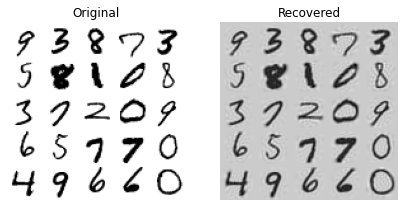

In [14]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original")

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered")

plt.show()

In [15]:
X_reduced_pca = X_reduced

역변환 공식은 아래와 같습니다.

$$ X_{recovered} = X_{d-proj} \cdot W^T_d $$

### 3.8 점진적 PCA

PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것입니다. 다행히 **점진적 PCA**(Incremental PCA)(IPCA) 알고리즘이 개발되었습니다. 훈련 세트를 미니 배치로 나눈 뒤 IPCA 알고리즘에 한번에 하나씩 주입합니다. 이런 방식은 훈련 세트가 클 때 유용하고 온라인으로(즉, 새로운 데이터가 준비되는대로 실시간으로) PCA를 적용할 수도 있습니다.

다음 코드는 MNIST 데이터셋을 넘파이의 `array_split()` 함수를 사용해 100개의 미니배치로 나누고 사이킷런의 `IncrementalPCA` 파이썬 클래스에 주입하여 MNIST 데이터셋의 차원을 (이전과 같은) 154개로 줄입니다. 전체 훈련 세트를 사용하는 `fit()` 메서드가 아니라 `partial_fit()` 메서드를 미니배치마다 호출해야 합니다. 

In [16]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

In [17]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

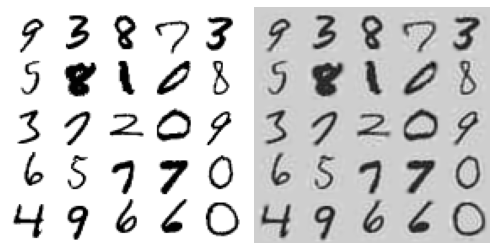

In [18]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과를 비교해보겠습니다. 먼저 평균이 같은지 확인합니다. 

In [19]:
X_recovered_inc_pca = X_reduced

In [20]:
np.allclose(pca.mean_, inc_pca.mean_)

True

하지만 결과는 완전히 동일하지 않습니다. 점진적 PCA는 아주 훌륭한 근사치를 제공하지만 완벽하지는 않습니다. 

In [21]:
np.allclose(X_reduced_pca, X_recovered_inc_pca)

False

또 다른 방법은 넘파이의 `memmap` 파이썬 클래스를 사용해 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 들어있는 것처럼 다루는 것입니다. 이 파이썬 클래스는 필요할 때 데이터를 메모리에 적재합니다. `IncrementalPCA`는 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결할 수 있습니다. 다음 코드처럼 이 방식을 적용하면 일반적인 `fit()` 메서드를 사용할 수 있습니다. 

In [22]:
filename = 'my_mnist.data'
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

먼저 `memmap()` 구조를 만들고 MNIST 데이터를 복사합니다. 이는 일반적으로 별도의 프로그램에서 먼저 수행됩니다. 

이제 `memmap()` 객체를 삭제하면 파이썬 종결자(finalizer)를 호출해서 데이터를 디스크에 저장하게 됩니다.


In [23]:
del X_mm

다음에 다른 프로그램에서  데이터를 로드하여 훈련에 사용합니다. 

In [24]:
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

### 3.9 랜덤 PCA

사이킷런에는 PCA의 또 다른 옵션으로 **랜덤 PCA**(Randomized PCA)를 제공합니다. 이 방식은 확률적인 알고리즘으로, 첫 $d$개의 주성분에 대한 근삿값을 빠르게 찾습니다. 이 알고리즘의 계산 복잡도는 $ O(m \times n^2) + O(n^3) $이 아니라 $ O(m \times d^2) + O(d^3) $입니다. 그래서 $d$가 $n$보다 많이 작으면 앞선 알고리즘보다 매우 빨라집니다. 

In [25]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 4. 커널 PCA

5장에서 샘플을 매우 높은 고차원 공간(**특성 공간**(feature space))으로 암묵적으로 매핑하여 서포트 벡터 머신의 비선형 분류를 회귀를 가능하게 하는 수학적 기법인 커널 트릭에 대해 이야기했습니다. 고차원 특성 공간에서의 선형 결정 경계는 **원본 공간**에서는 복잡한 비선형 결정 경계에 해당한다는 것을 배웠습니다. 

같은 기법을 PCA에 적용해 차원 축소를 위한 비선형 투형을 수행할 수 있습니다. 이를 **커널 PCA**(kernel PCA)(kPCA)라고 합니다. 이 기법은 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용합니다. 

예를 들어 다음 코드는 사이킷런의 `KernelPCA`를 사용해 RBF 커널로 kPCA를 적용하고 있습니다. 

In [61]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

아래 그림은 선형 커널, RBF커널, 시그모이드 커널을 사용해서 2차원으로 축소시킨 스위스 롤의 모습입니다. 

In [ ]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear Kernel"), (132, rbf_pca, "RBF Kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid Kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()